In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2

In [2]:
from sklearn import preprocessing, metrics
import utils
import scipy.io
import numpy as np
from linear_classifier import LinearSVM_twoclass

# load the SPAM email training dataset

X,y = utils.load_mat('data/spamTrain.mat')
yy = np.ones(y.shape)
yy[y==0] = -1

val_indx = 3000
Xval = X[val_indx:y.shape[0]]
yval = yy[val_indx:y.shape[0]]

X = X[0:val_indx]
yy = yy[0:val_indx]

# load the SPAM email test dataset

test_data = scipy.io.loadmat('data/spamTest.mat')
X_test = test_data['Xtest']
y_test = test_data['ytest'].flatten()
yy_test = np.ones(y_test.shape)
yy_test[y_test == 0] = -1

##################################################################################
#  YOUR CODE HERE for training the best performing SVM for the data above.       #
#  what should C be? What should num_iters be? Should X be scaled?               #
#  should X be kernelized? What should the learning rate be? What should the     #
#  number of iterations be?                                                      #

In [ ]:
##################################################################################
# Should X be scaled? Yes
# Should X be kernelized? Yes
from linear_classifier import LinearSVM
Best_accuracy = 0
sigmas = [1,10,100]
# choosing sigma
for sigma in sigmas:
    # compute the kernel (slow!)
    K = np.array([utils.gaussian_kernel(x1,x2,sigma) for x1 in X for x2 in X]).reshape(X.shape[0],X.shape[0])
    # scale the kernelized data matrix
    scaler = preprocessing.StandardScaler().fit(K)
    scaleK = scaler.transform(K)
    # add the intercept term
    KK = np.vstack([np.ones((scaleK.shape[0],)),scaleK.T]).T

    # seperating val set
    # compute the kernel (slow!)
    Kval = np.array([utils.gaussian_kernel(x1,x2,sigma) for x1 in Xval for x2 in X]).reshape(Xval.shape[0],X.shape[0])
    # scale the kernelized data matrix
    scaler_val = preprocessing.StandardScaler().fit(Kval)
    scaleK_val = scaler.transform(Kval)
    # add the intercept term
    KKval = np.vstack([np.ones((scaleK_val.shape[0],)),scaleK_val.T]).T 

    # seperating train set
    # compute the kernel (slow!)
    Ktest = np.array([utils.gaussian_kernel(x1,x2,sigma) for x1 in X_test for x2 in X]).reshape(X_test.shape[0],X.shape[0])
    # scale the kernelized data matrix
    scaler_test = preprocessing.StandardScaler().fit(Ktest)
    scaleK_test = scaler.transform(Ktest)
    # add the intercept term
    KKtest = np.vstack([np.ones((scaleK_test.shape[0],)),scaleK_test.T]).T 
        
    svm = LinearSVM_twoclass()     
    svm.train(KK,yy,learning_rate=1e-4,reg=100,num_iters=1000,verbose=False,batch_size=KK.shape[0])
    predy = svm.predict(KKval)
    accuracy = np.mean(predy == yval)
    print("Accuracy is ",accuracy, "when sigma = ",sigma)
    if accuracy > Best_accuracy:
        Best_accuracy, Best_sigma = accuracy, sigma
print("Best accuracy = ", Best_accuracy, "Best sigma = ", Best_sigma)


In [ ]:
sigma = Best_sigma
# compute the kernel (slow!)
K = np.array([utils.gaussian_kernel(x1,x2,sigma) for x1 in X for x2 in X]).reshape(X.shape[0],X.shape[0])
# scale the kernelized data matrix
scaler = preprocessing.StandardScaler().fit(K)
scaleK = scaler.transform(K)
# add the intercept term
KK = np.vstack([np.ones((scaleK.shape[0],)),scaleK.T]).T

# seperating val set
# compute the kernel (slow!)
Kval = np.array([utils.gaussian_kernel(x1,x2,sigma) for x1 in Xval for x2 in X]).reshape(Xval.shape[0],X.shape[0])
# scale the kernelized data matrix
scaler_val = preprocessing.StandardScaler().fit(Kval)
scaleK_val = scaler.transform(Kval)
# add the intercept term
KKval = np.vstack([np.ones((scaleK_val.shape[0],)),scaleK_val.T]).T 

# seperating train set
# compute the kernel (slow!)
Ktest = np.array([utils.gaussian_kernel(x1,x2,sigma) for x1 in X_test for x2 in X]).reshape(X_test.shape[0],X.shape[0])
# scale the kernelized data matrix
scaler_test = preprocessing.StandardScaler().fit(Ktest)
scaleK_test = scaler.transform(Ktest)
# add the intercept term
KKtest = np.vstack([np.ones((scaleK_test.shape[0],)),scaleK_test.T]).T 


In [4]:
Best_accuracy, Best_C = 0, 0
# what should C be?
Cvals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
for C in Cvals:
    svm = LinearSVM_twoclass()     
    svm.train(KK,yy,learning_rate=1e-4,reg=C,num_iters=1000,verbose=False,batch_size=KK.shape[0])
    predy = svm.predict(KKval)
    accuracy = np.mean(predy == yval)
    print("Accuracy is ",accuracy, "when C = ",C)
    if accuracy > Best_accuracy:
        Best_accuracy, Best_C = accuracy, C
print("Best accuracy = ", Best_accuracy, "Best C = ", Best_C)

Accuracy is  0.599 when C =  0.01
Accuracy is  0.632 when C =  0.03
Accuracy is  0.698 when C =  0.1
Accuracy is  0.853 when C =  0.3
Accuracy is  0.922 when C =  1
Accuracy is  0.934 when C =  3
Accuracy is  0.959 when C =  10
Accuracy is  0.963 when C =  30
Accuracy is  0.976 when C =  100
Best accuracy =  0.976 Best C =  100


Accuracy is  0.708 when learning rate =  0.01
Accuracy is  0.967 when learning rate =  0.001
Accuracy is  0.975 when learning rate =  0.0001
Accuracy is  0.958 when learning rate =  1e-05


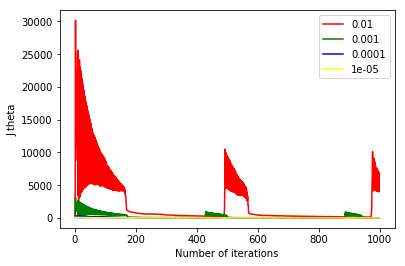

Best accuracy =  0.975 Best learning rate =  0.0001


In [14]:
# What should the learning rate be?
Best_accuracy, Best_lr = 0, 0
color = ['red','green','blue','yellow']
count = 0
# Best_C =  100
learning_rates = [1e-2, 1e-3, 1e-4, 1e-5]
fig = plt.figure()
for lr in learning_rates:
    svm = LinearSVM_twoclass()
    J_theta = svm.train(KK,yy,learning_rate=lr,reg=Best_C,num_iters=1000,verbose=False,batch_size=KK.shape[0])
    predy = svm.predict(KKval)
    accuracy = np.mean(predy == yval)
    print("Accuracy is ",accuracy, "when learning rate = ",lr)
    if accuracy > Best_accuracy:
        Best_accuracy, Best_lr = accuracy,lr
    J_reverse = J_theta.sort(reverse = True)
    plt.plot(range(len(J_reverse)),J_reverse)
    count += 1
plt.xlabel('Number of iterations')
plt.ylabel('J theta')
plt.legend([str(i) for i in learning_rates])
plt.show()
print("Best accuracy = ", Best_accuracy, "Best learning rate = ", Best_lr)

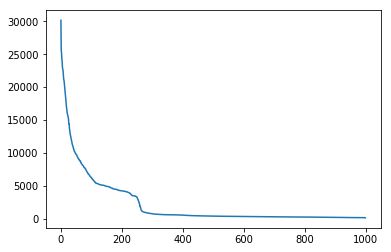

In [41]:
# J_reverse = J_theta.sort(reverse = True)
# len(J_reverse)
plt.plot(range(len(J_theta)),J_theta)

In [33]:
svm = LinearSVM_twoclass()
J_theta = svm.train(KK,yy,learning_rate=1e-2,reg=Best_C,num_iters=1000,verbose=False,batch_size=KK.shape[0])
predy = svm.predict(KKval)
accuracy = np.mean(predy == yval)
print(accuracy,J_theta)
if accuracy > Best_accuracy:
    Best_accuracy, Best_lr = accuracy,lr
J_reverse = J_theta.sort(reverse = True)
plt.plot(range(len(J_reverse)),J_reverse)

0.698 [100.13046279031758, 5241.139282415243, 30180.461151856784, 10659.511732242421, 22769.393470041723, 15967.367351834777, 15557.40819435992, 21048.685593841346, 8796.373517591823, 25235.930328221555, 3492.7850970941195, 25602.71940123964, 2619.9064356803437, 24187.76365606151, 3487.1632625224825, 24042.095995183747, 3195.5367468417317, 22982.507411858252, 3796.545193865064, 22519.72318756335, 3797.6259992821197, 21821.576653268046, 4002.74367737703, 21241.84941518567, 4186.863729262715, 20686.947515940723, 4333.320078715399, 20162.484015967068, 4477.690504678104, 19538.52249306005, 4633.755944930908, 18983.55540691974, 4638.448477910412, 18536.489885027077, 4618.887108187676, 17937.649942631542, 4806.801386730306, 17523.21980645987, 4913.746072636885, 17131.935624910715, 4942.0648305636205, 16688.090689551176, 5108.208688568523, 16296.940969127812, 5125.132179264311, 15804.321266096498, 5267.28244587135, 15437.803658232835, 5253.2401461596355, 15060.063180930332, 5223.920469801366,

TypeError: object of type 'NoneType' has no len()

In [6]:
# What should the number of iterations be? 
Best_accuracy, Best_ni = 0, 0
num_iters = [2000, 5000, 10000]
for ni in num_iters:
    svm = LinearSVM_twoclass()
    J_theta = svm.train(KK,yy,learning_rate=Best_lr,reg=Best_C,num_iters=ni,verbose=True,batch_size=KK.shape[0])
    predy = svm.predict(KKval)
    accuracy = np.mean(predy == yval)
    print("Accuracy is ",accuracy, "when number of iteration = ",ni)
    if accuracy > Best_accuracy:
        Best_accuracy, Best_ni = accuracy,ni
print("Best accuracy = ", Best_accuracy, "Best iteration number = ", Best_ni)

iteration 0 / 2000: loss 99.937522
iteration 100 / 2000: loss 67.396680
iteration 200 / 2000: loss 49.893368
iteration 300 / 2000: loss 14.022788
iteration 400 / 2000: loss 14.110224
iteration 500 / 2000: loss 37.372113
iteration 600 / 2000: loss 10.804756
iteration 700 / 2000: loss 10.141990
iteration 800 / 2000: loss 9.100913
iteration 900 / 2000: loss 34.392209
iteration 1000 / 2000: loss 8.268447
iteration 1100 / 2000: loss 7.589044
iteration 1200 / 2000: loss 8.605159
iteration 1300 / 2000: loss 7.219641
iteration 1400 / 2000: loss 6.794903
iteration 1500 / 2000: loss 7.059027
iteration 1600 / 2000: loss 6.517537
iteration 1700 / 2000: loss 6.709078
iteration 1800 / 2000: loss 6.157251
iteration 1900 / 2000: loss 7.479385
Accuracy is  0.977 when number of iteration =  2000
iteration 0 / 5000: loss 100.091277
iteration 100 / 5000: loss 67.570644
iteration 200 / 5000: loss 49.280568
iteration 300 / 5000: loss 14.023691
iteration 400 / 5000: loss 14.320165
iteration 500 / 5000: loss 

In [7]:
##################################################################################
# YOUR CODE HERE for testing your best model's performance                       #
# what is the accuracy of your best model on the test set? On the training set?  #
##################################################################################
Best_C = 3
svm = LinearSVM_twoclass()
J_theta = svm.train(KK,yy,learning_rate=Best_lr,reg=Best_C,num_iters=ni,verbose=True,batch_size=KK.shape[0])
predy = svm.predict(KKtest)
accuracy = np.mean(predy == yy_test)
print("Best accuracy = ", accuracy, "when best C is", Best_C, "Best learning rate is", Best_lr, "Best iteration number is", Best_ni)

iteration 0 / 10000: loss 2.987655
iteration 100 / 10000: loss 1.972815
iteration 200 / 10000: loss 1.399853
iteration 300 / 10000: loss 1.140813
iteration 400 / 10000: loss 0.993460
iteration 500 / 10000: loss 0.893914
iteration 600 / 10000: loss 0.821180
iteration 700 / 10000: loss 0.767750
iteration 800 / 10000: loss 0.724904
iteration 900 / 10000: loss 0.689762
iteration 1000 / 10000: loss 0.660427
iteration 1100 / 10000: loss 0.634873
iteration 1200 / 10000: loss 0.612135
iteration 1300 / 10000: loss 0.592125
iteration 1400 / 10000: loss 0.574676
iteration 1500 / 10000: loss 0.558953
iteration 1600 / 10000: loss 0.544344
iteration 1700 / 10000: loss 0.530922
iteration 1800 / 10000: loss 0.518835
iteration 1900 / 10000: loss 0.507708
iteration 2000 / 10000: loss 0.497417
iteration 2100 / 10000: loss 0.487931
iteration 2200 / 10000: loss 0.478963
iteration 2300 / 10000: loss 0.470248
iteration 2400 / 10000: loss 0.462266
iteration 2500 / 10000: loss 0.454938
iteration 2600 / 10000: 

In [12]:
##################################################################################
# ANALYSIS OF MODEL: Print the top 15 words that are predictive of spam and for  #
# ham. Hint: use the coefficient values of the learned model                     #
##################################################################################
words, inv_words = utils.get_vocab_dict()
print("top 15 word that are predictive of spam")
XXX = np.dot(svm.theta[1:],X).argsort()
for i in XXX[-15:][::-1]:
    print(words[i + 1])
print("top 15 word that are predictive of ham")
for i in XXX[:15][::1]:
    print(words[i + 1])
##################################################################################
#                    END OF YOUR CODE                                            #
##################################################################################

top 15 word that are predictive of spam
our
click
remov
pleas
here
your
we
receiv
nbsp
free
inform
dollarnumb
below
offer
email
top 15 word that are predictive of ham
httpaddr
but
wrote
it
date
user
that
my
url
thei
there
emailaddr
which
group
run
